In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils

# 讀取訓練資料與測試資料

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,left_eye_x,right_eye_x,nose_x,left_mouth_x,right_mouth_x,left_eye_y,right_eye_y,nose_y,left_mouth_y,right_mouth_y,gender,smile,glasses,head_pose,path
0,0.429,0.591,0.505,0.425,0.563,0.435,0.453,0.575,0.635,0.651,1.0,2.0,2.0,3.0,lfw_5590/Aaron_Eckhart_0001.jpg
1,0.405,0.587,0.501,0.375,0.559,0.449,0.471,0.551,0.643,0.659,1.0,1.0,2.0,3.0,lfw_5590/Aaron_Guiel_0001.jpg
2,0.431,0.591,0.521,0.437,0.591,0.457,0.457,0.563,0.617,0.615,1.0,1.0,2.0,3.0,lfw_5590/Aaron_Peirsol_0001.jpg
3,0.411,0.585,0.505,0.483,0.589,0.471,0.419,0.551,0.659,0.627,1.0,2.0,2.0,3.0,lfw_5590/Aaron_Pena_0001.jpg
4,0.409,0.579,0.523,0.401,0.573,0.453,0.451,0.555,0.625,0.623,1.0,1.0,2.0,3.0,lfw_5590/Aaron_Sorkin_0001.jpg


In [4]:
test_data.head()

,Id
0,AFLW/0001-image20056.jpg
1,AFLW/0002-image04733.jpg
2,AFLW/0003-image07098.jpg
3,AFLW/0004-image64929.jpg
4,AFLW/0005-image15367.jpg


# 讀取訓練圖片與測試圖片

In [5]:
# 可以調整要壓縮的圖片像素
RESIZE = 40

In [6]:
train_data_x = np.ndarray((len(train_data), RESIZE, RESIZE, 3))
train_data_y = np.ndarray((len(train_data), 14))
test_data_x = np.ndarray((len(test_data), RESIZE, RESIZE, 3))


In [7]:
# 讀取圖片的function
# Reads an image from a file, decodes it into a dense tensor, and resizes it to a fixed shape.
def _parse_function(filename):
    image_string = tf.io.read_file(filename)
    image_decoded = tf.image.decode_jpeg(image_string, channels=3) # Channels needed because some test images are b/w
    image_resized = tf.image.resize(image_decoded, [RESIZE, RESIZE])
    return image_resized

In [8]:
len(train_data)

10000

In [9]:
# 讀取路徑後，將讀取的圖片調整大小，並存入train_data_x, train_data_y
for i, row in enumerate(train_data.values):
    image = _parse_function(row[14])

    train_data_x[i] = image
    train_data_y[i] = row[:14]
    if i%2000 == 0: print('Processed {} of {}'.format(i, len(train_data)))

Processed 0 of 10000
Processed 2000 of 10000
Processed 4000 of 10000
Processed 6000 of 10000
Processed 8000 of 10000


In [10]:
# # 讀取路徑後，將讀取的圖片調整大小，test_data_x
for i, row in enumerate(test_data.values):
    image = _parse_function(row[0])
    test_data_x[i] = image
    if i%2000 == 0: print('Processed {} of {}'.format(i, len(test_data)))

Processed 0 of 2995
Processed 2000 of 2995


Text(3,3,'Predicted smile: 2.0 ')

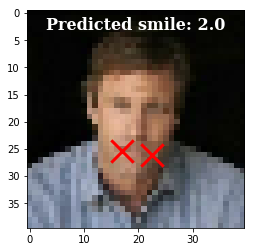

In [12]:
# 畫出重新調整後的圖片
font = {'family': 'serif', 'color':  'white', 'weight': 'bold', 'size': 16}
plt.imshow(train_data_x[0]/255)
plt.scatter(train_data_y[0,3] * RESIZE, train_data_y[0,8] * RESIZE, 500, marker='x', color='red', linewidth=3)
plt.scatter(train_data_y[0,4] * RESIZE, train_data_y[0,9] * RESIZE, 500, marker='x', color='red', linewidth=3)
plt.text(3, 3, 'Predicted smile: {} '.format(train_data_y[0,11]),fontdict=font)

# 資料前處理
- 資料並不是讀進來就可以立即使用，有些參數需要前處理
- 例如，在本資料中`gender=1`為男性，`gender=2`為女性，如果要做binary classification需要轉換成`0`或`1`

# 建立模型
- 自行建立模型，並且以mutlitask任務的架構
- 可以參考https://www.tensorflow.org/guide/keras/functional

# 匯出預測結果
- 利用pandas.Dataframe.to_csv()來匯出上傳到kaggle競賽
- 對於**binary classification**問題，欄位必須要有`Id`與`Category`
- 對於**regression**問題，欄位必須要有`Id`與`Expected`
- `Id`欄位就是測試資料的圖片位置例如:`AFLW/0001-image20056.jpg`
- 注意，對於預測左嘴角與右嘴角時需要把**XY值相加**，並分別上傳

In [ ]:
left_mouth_corner_sum = None
right_mouth_corner_sum = None

In [ ]:
# 將預測的結果放入，建立DataFrame物件，此為`微笑`預測結果
tmp1 = pd.DataFrame({'Id':test_data['path'],'Category': None})

In [ ]:
# 將預測的結果放入，建立DataFrame物件，此為`左嘴角`預測結果
tmp2 = pd.DataFrame({'Id':test_data['path'],'Expected': left_mouth_corner_sum})

In [ ]:
# 將預測的結果放入，建立DataFrame物件，此為`右嘴角`預測結果
tmp3 = pd.DataFrame({'Id':test_data['path'],'Expected': right_mouth_corner_sum})

In [ ]:
tmp1.to_csv("test_smile_result.csv", index=False)

In [ ]:
tmp2.to_csv("test_left_mouth_result.csv", index=False)

In [ ]:
tmp3.to_csv("test_right_mouth_result.csv", index=False)